## Creating CNN Using Scratch And Transfer Learning

- time taken if we run same using GPU
- code from scratch using CNN and transfer learning
- Download [Dataset](https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria)


In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
# vgg19 give better accuracy than vgg16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# if tensorflow version is less than 2 then remove tensorflow dot from above import of libraries
import tensorflow as tf
print(tf.__version__)

2.4.1


In [5]:
# re-size all the images to this
# when open image in paint and check for pixel then it was more than 130
# So decided to take enlarge image using 224,224
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'


In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
#[3] represent three RGB channel
# include_top=False remove first and last layer

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [23]:
mobilnet.summaryaryary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [8]:
# useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [9]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [10]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [12]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
from tensorflow.keras.layers import MaxPooling2D

In [14]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',# not binary entropy as we hav 2 node at end
  optimizer='adam',
  metrics=['accuracy']
)


In [16]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [18]:
training_set

In [19]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [21]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\neetu\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
13/13 [==============================] - 14s 1s/step - loss: 2.9185 - accuracy: 0.5372 - val_loss: 0.6331 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 13s 1s/step - loss: 0.6977 - accuracy: 0.5073 - val_loss: 0.7046 - val_accuracy: 0.4179
Epoch 3/50
13/13 [==============================] - 15s 1s/step - loss: 0.6740 - accuracy: 0.5921 - val_loss: 0.7278 - val_accuracy: 0.3806
Epoch 4/50
13/13 [==============================] - 15s 1s/step - loss: 0.6735 - accuracy: 0.5800 - val_loss: 0.6867 - val_accuracy: 0.5075
Epoch 5/50
13/13 [==============================] - 13s 1s/step - loss: 0.6698 - accuracy: 0.5721 - val_loss: 0.6924 - val_accuracy: 0.5149
Epoch 6/50
13/13 [==============================] - 14s 1s/step - loss: 0.5939 - accuracy: 0.6975 - val_loss: 0.8248 - val_accuracy: 0.3881
Epoch 7/50
13/13 [==============================] - 14s 1s/step - loss: 0.6568 - accuracy: 0.6266 - val_loss: 0.8050 - val_accuracy: 0.4030
Epoch 8/50
13/13 [==

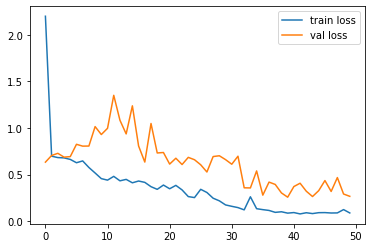

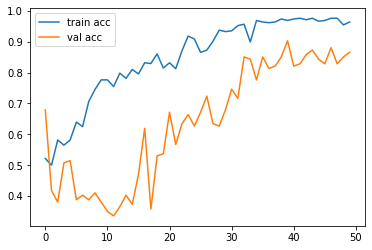

<Figure size 432x288 with 0 Axes>

In [24]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [26]:

y_pred = model.predict(test_set)


In [27]:
y_pred

array([[2.5166008e-01, 7.4833989e-01],
       [9.9627906e-01, 3.7208740e-03],
       [9.9999988e-01, 7.2417564e-08],
       [7.4522078e-02, 9.2547792e-01],
       [1.0000000e+00, 2.1013752e-11],
       [9.9340111e-01, 6.5988549e-03],
       [9.9976450e-01, 2.3555454e-04],
       [9.9647164e-01, 3.5283961e-03],
       [9.9741095e-01, 2.5890246e-03],
       [4.5458898e-02, 9.5454109e-01],
       [3.7139796e-02, 9.6286023e-01],
       [2.6269421e-02, 9.7373056e-01],
       [3.9473604e-02, 9.6052635e-01],
       [9.9972564e-01, 2.7439688e-04],
       [9.9997151e-01, 2.8451548e-05],
       [1.0000000e+00, 1.5029308e-08],
       [9.9968290e-01, 3.1712218e-04],
       [9.9828941e-01, 1.7106257e-03],
       [6.8319432e-02, 9.3168062e-01],
       [9.9996197e-01, 3.7978276e-05],
       [9.7552061e-01, 2.4479439e-02],
       [9.7879350e-01, 2.1206416e-02],
       [9.9821389e-01, 1.7861691e-03],
       [1.8420669e-01, 8.1579328e-01],
       [9.9999976e-01, 2.2437089e-07],
       [9.9760568e-01, 2.

In [28]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [29]:
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1], dtype=int64)

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [31]:
model=load_model('model_vgg19.h5')

In [32]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))

In [33]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [34]:
x.shape

(224, 224, 3)

In [35]:
x=x/255

In [36]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [37]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [38]:
a=np.argmax(model.predict(img_data), axis=1)

In [39]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
